# 激活函数

- [参考链接1](https://blog.csdn.net/u014595019/article/details/52562159)
- [参考链接2](https://blog.csdn.net/qq_23304241/article/details/80300149)

## 什么是激活函数

关于激活函数，首先要搞清楚的问题是，激活函数是什么，有什么用？不用激活函数可不可以？答案是不可以。激活函数的主要作用是提供网络的非线性建模能力。如果没有激活函数，那么该网络仅能够表达线性映射，此时即便有再多的隐藏层，其整个网络跟单层神经网络也是等价的。因此也可以认为，只有加入了激活函数之后，深度神经网络才具备了分层的非线性映射学习能力。 那么激活函数应该具有什么样的性质呢？

- 可微性： 当优化方法是基于梯度的时候，这个性质是必须的。 
- 单调性： 当激活函数是单调的时候，单层网络能够保证是凸函数。 
- 输出值的范围： 当激活函数输出值是 有限 的时候，基于梯度的优化方法会更加 稳定，因为特征的表示受有限权值的影响更显著;当激活函数的输出是 无限 的时候，模型的训练会更加高效，不过在这种情况小，一般需要更小的learning rate。

从目前来看，常见的激活函数多是分段线性和具有指数形状的非线性函数。

## 激活函数分类

激活函数可以分为`饱和激活函数`和`非饱和激活函数`。

- 饱和激活函数。 tanh、Sigmoid、...
- 非饱和激活函数。 ReLU、ELU、Leaky ReLU、RReLU、RReLU、...

### Sigmoid激活函数

sigmoid 是使用范围最广的一类激活函数，具有指数函数形状，它在物理意义上最为接近生物神经元。此外，(0, 1) 的输出还可以被表示作概率，或用于输入的归一化，代表性的如Sigmoid交叉熵损失函数。

公式：

$$ f(x) = \frac{1}{1+ e^{-x}} $$


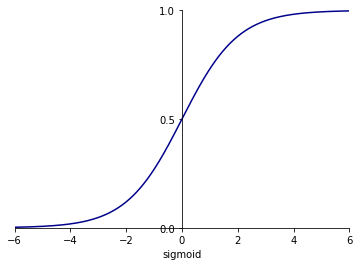

In [13]:
# 绘制Sigmoid标准曲线
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-6,6,1000)  #这个表示在-5到5之间生成1000个x值
y=[1/(1+np.exp(-i)) for i in x]  #对上述生成的1000个数循环用sigmoid公式求对应的y

plt.xlim((-6,6)) # 设置取值范围
plt.ylim((0.00,1.00)) 
plt.yticks([0,0.5,1.0]) #设置刻度
plt.plot(x,y,color='darkblue')  #用上述生成的1000个xy值对生成1000个点

ax=plt.gca()
ax.spines['right'].set_color('none')  #删除右边框设为无
ax.spines['top'].set_color('none')    #删除上边框设为无
ax.xaxis.set_ticks_position('bottom')

ax.spines['bottom'].set_position(('data', 0))  #调整x轴位置
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))   #调整y轴位置
plt.xlabel("sigmoid") #设置x轴标签
plt.show() 

然而，sigmoid也有其自身的缺陷，最明显的就是饱和性。从上图可以看到，其两侧导数逐渐趋近于0，也就是$x \to +\infty$或$x \to -\infty$，函数的导数为0，公式表示如下：

$$ \lim_{x \to \infty}{f^{'}(x) = 0}$$

具有这种性质的称为软饱和激活函数。具体的，饱和又可分为`左饱和`与`右饱和`。与软饱和对应的是硬饱和, 即 

$$ f^{'}(x) = 0 ,当|x|>c,其中c为常数$$

sigmoid的软饱和性，使得深度神经网络在二三十年里一直难以有效的训练，是阻碍神经网络发展的重要原因。

具体来说，由于在后向传递过程中，sigmoid向下传导的梯度包含了一个 f′(x)因子（sigmoid关于输入的导数），因此一旦输入落入饱和区，f′(x) 就会变得接近于0，导致了向底层传递的梯度也变得非常小。此时，网络参数很难得到有效训练。`这种现象被称为梯度消失`。一般来说， sigmoid 网络在5层之内就会产生梯度消失现象。

此外，sigmoid函数的输出均大于0，使得输出不是`0均值`，`这称为偏移现象`，这会导致后一层的神经元将得到上一层输出的非0均值的信号作为输入。

### tanh激活函数

tanh也是一种非常常见的激活函数。输出值范围(-1,1),与sigmoid相比，它的输出均值是0，使得其收敛速度要比sigmoid快，减少迭代次数。

公式如下：

$$ f(x) = \frac{1-e^{-2x}}{1+e^{-2x}} $$

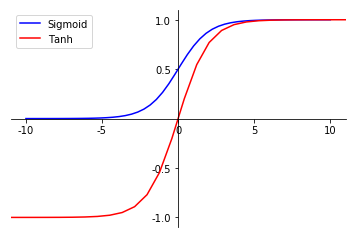

In [16]:
# 绘制激活函数
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False
 
 
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
 
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
 
x = np.linspace(-10, 10)
y = sigmoid(x)
tanh = 2*sigmoid(2*x) - 1
 
plt.xlim(-11,11) # 设置取值区间
plt.ylim(-1.1,1.1)
 
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
 
ax.xaxis.set_ticks_position('bottom') # 
ax.spines['bottom'].set_position(('data',0))
ax.set_xticks([-10,-5,0,5,10])  # 设置刻度

ax.yaxis.set_ticks_position('left')  # 
ax.spines['left'].set_position(('data',0))
ax.set_yticks([-1,-0.5,0.5,1])
 
plt.plot(x,y,label="Sigmoid",color = "blue")  # 绘制sigmoid曲线，并添加图例效果
plt.plot(2*x,tanh,label="Tanh", color = "red") # 绘制tanh曲线，并添加图例效果
plt.legend()
plt.show()

然而，从图中可以看出，tanh一样具有软饱和性，从而造成梯度消失。

### ReLU家族

ReLU家族包含很多激活函数：ReLU、ELU、P-ReLU、Leaky-ReLU、R-ReLU，其它都是基于`ReLU`作出的各种变体或改造。

ReLU的全称`是Rectified Linear Units`，是一种后来才出现的激活函数。 公式如下：

$$ f(x)=\begin{cases}  
        x, x>=0 \\
        0, x<0
\end{cases}$$


可以看到，当x<0时，ReLU硬饱和，而当x>0时，则不存在饱和问题。所以，ReLU 能够在x>0时保持梯度不衰减，从而缓解梯度消失问题。这让我们能够直接以监督的方式训练深度神经网络，而无需依赖无监督的逐层预训练。

ReLU函数代表的的是“修正线性单元”，它是带有卷积图像的输入x的最大函数(x,0)。ReLU函数将矩阵x内所有负值都设为零，其余的值不变。ReLU函数的计算是在卷积之后进行的，因此它与tanh函数和sigmoid函数一样，同属于“非线性激活函数”。这一内容是由Geoff Hinton首次提出的。

ReLU 的缺点：
训练的时候很”脆弱”，很容易就”die”了。例如，一个非常大的梯度流过一个 ReLU 神经元，更新过参数之后，这个神经元再也不会对任何数据有激活现象了，那么这个神经元的梯度就永远都会是0。如果 learning rate 很大，那么很有可能网络中的 40% 的神经元都”dead”了。

如下是ReLU、Leaky ReLU、PReLU和RReLU的比较:
![](http://p0.ifengimg.com/pmop/2017/0701/C56E5C6FCBB36E70BA5EBC90CBD142BA320B3DF6_size19_w740_h217.jpeg)

### Maxout

maxout是通过分段线性函数来拟合所有可能的凸函数来作为激活函数的，但是由于线性函数是可学习，所以实际上是可以学出来的激活函数。具体操作是对所有线性取最大，也就是把若干直线的交点作为分段的界，然后每一段取最大。

maxout可以看成是relu家族的一个推广。

缺点在于增加了参数量。